# Ejercicio PCA (Principal Component Analysis)
En este ejercicio vas a trabajar con un dataset de información de ciudadanos como el estado civil, número de hijos, qué gastos e ingresos tiene, etc...

Se cuenta con un target, que es si el ciudadano va a alquilar o a comprar una vivienda. Para ello,  con PCA

### Importamos librerias
Principales librerías que usarás durante el notebook.

In [1]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import matplotlib.font_manager
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

### Cargamos datos de entrada
1. Carga el csv *comprar_alquilar.csv*
2. Obtén la información básica: columnas, dimensiones, descripción de las variables, missings...

In [3]:
df = pd.read_csv('data/comprar_alquilar.csv')
df

,ingresos,gastos_comunes,pago_coche,gastos_otros,ahorros,vivienda,estado_civil,hijos,trabajo,comprar
0,6000,1000,0,600,50000,400000,0,2,2,1
1,6745,944,123,429,43240,636897,1,3,6,0
2,6455,1033,98,795,57463,321779,2,1,8,1
3,7098,1278,15,254,54506,660933,0,0,3,0
4,6167,863,223,520,41512,348932,0,0,3,1
...,...,...,...,...,...,...,...,...,...,...
197,3831,690,352,488,10723,363120,0,0,2,0
198,3961,1030,270,475,21880,280421,2,3,8,0
199,3184,955,276,684,35565,388025,1,3,8,0
200,3334,867,369,652,19985,376892,1,2,5,0


### Visualicemos las dimensiones
Realiza un análisis univariante. Realiza la gráfica que consideres para cada variable, diferenciando por colores el target (*comprar*).

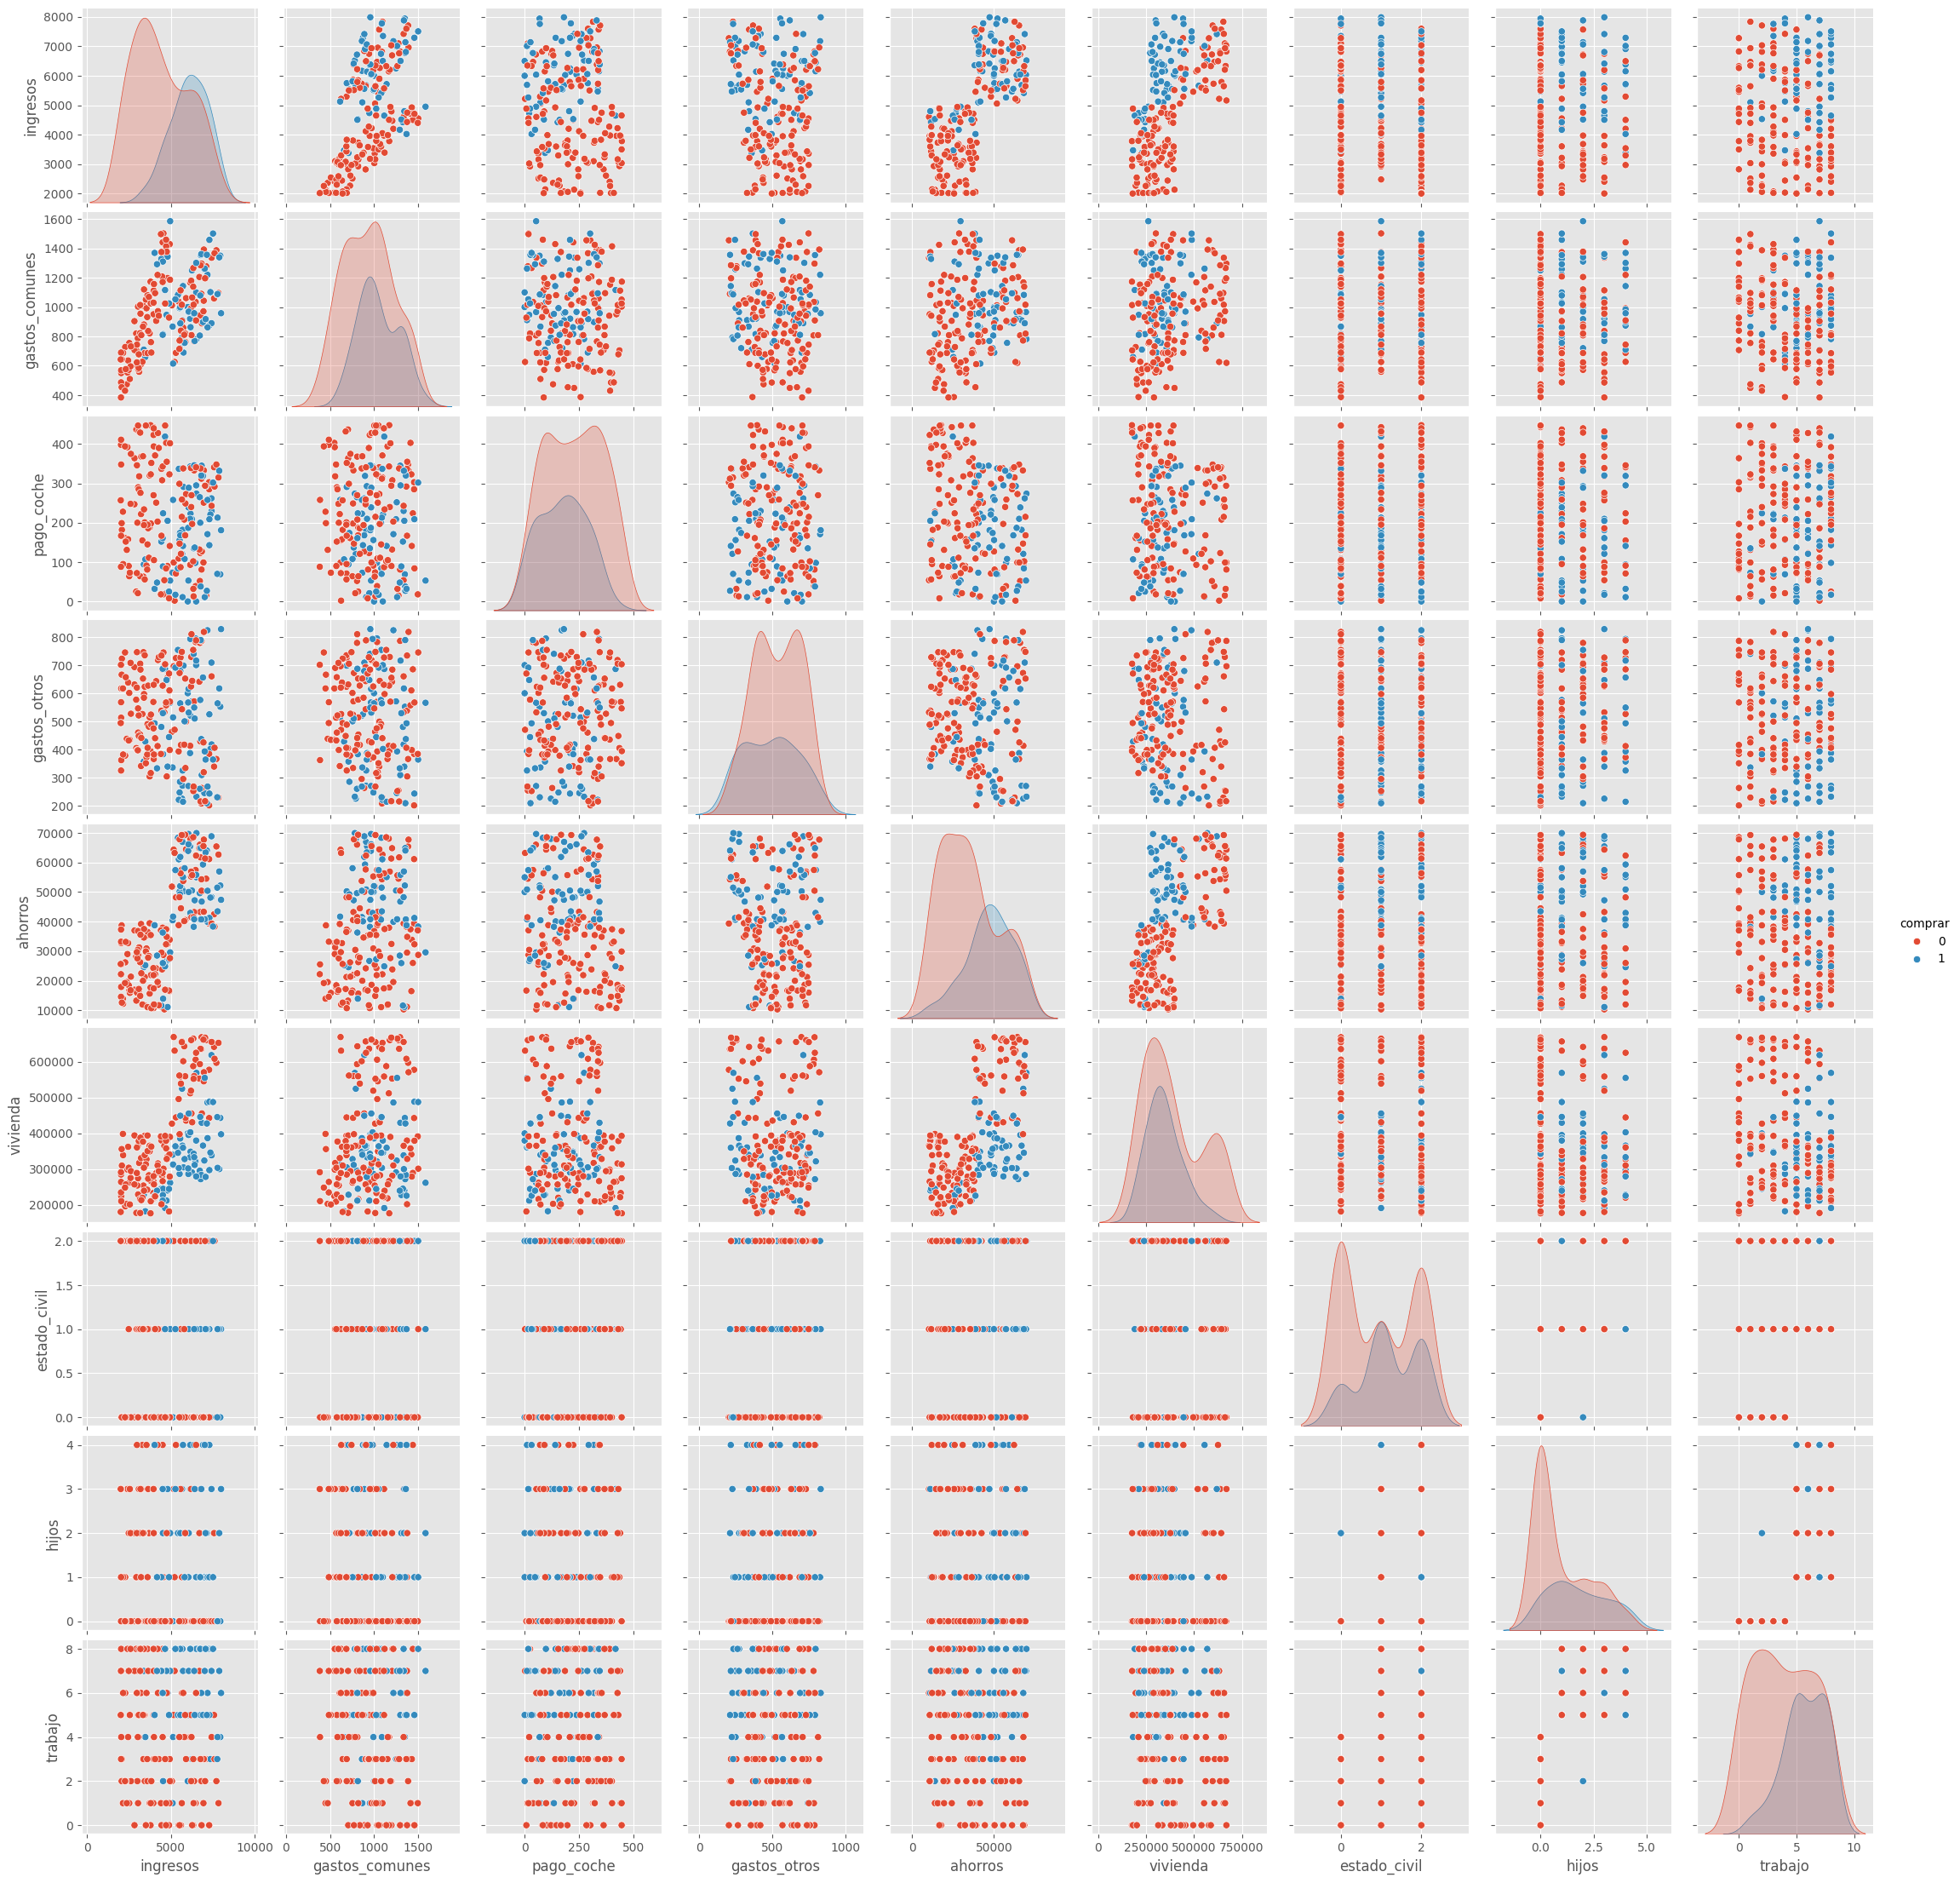

In [4]:
sns.pairplot(df, hue='comprar' )

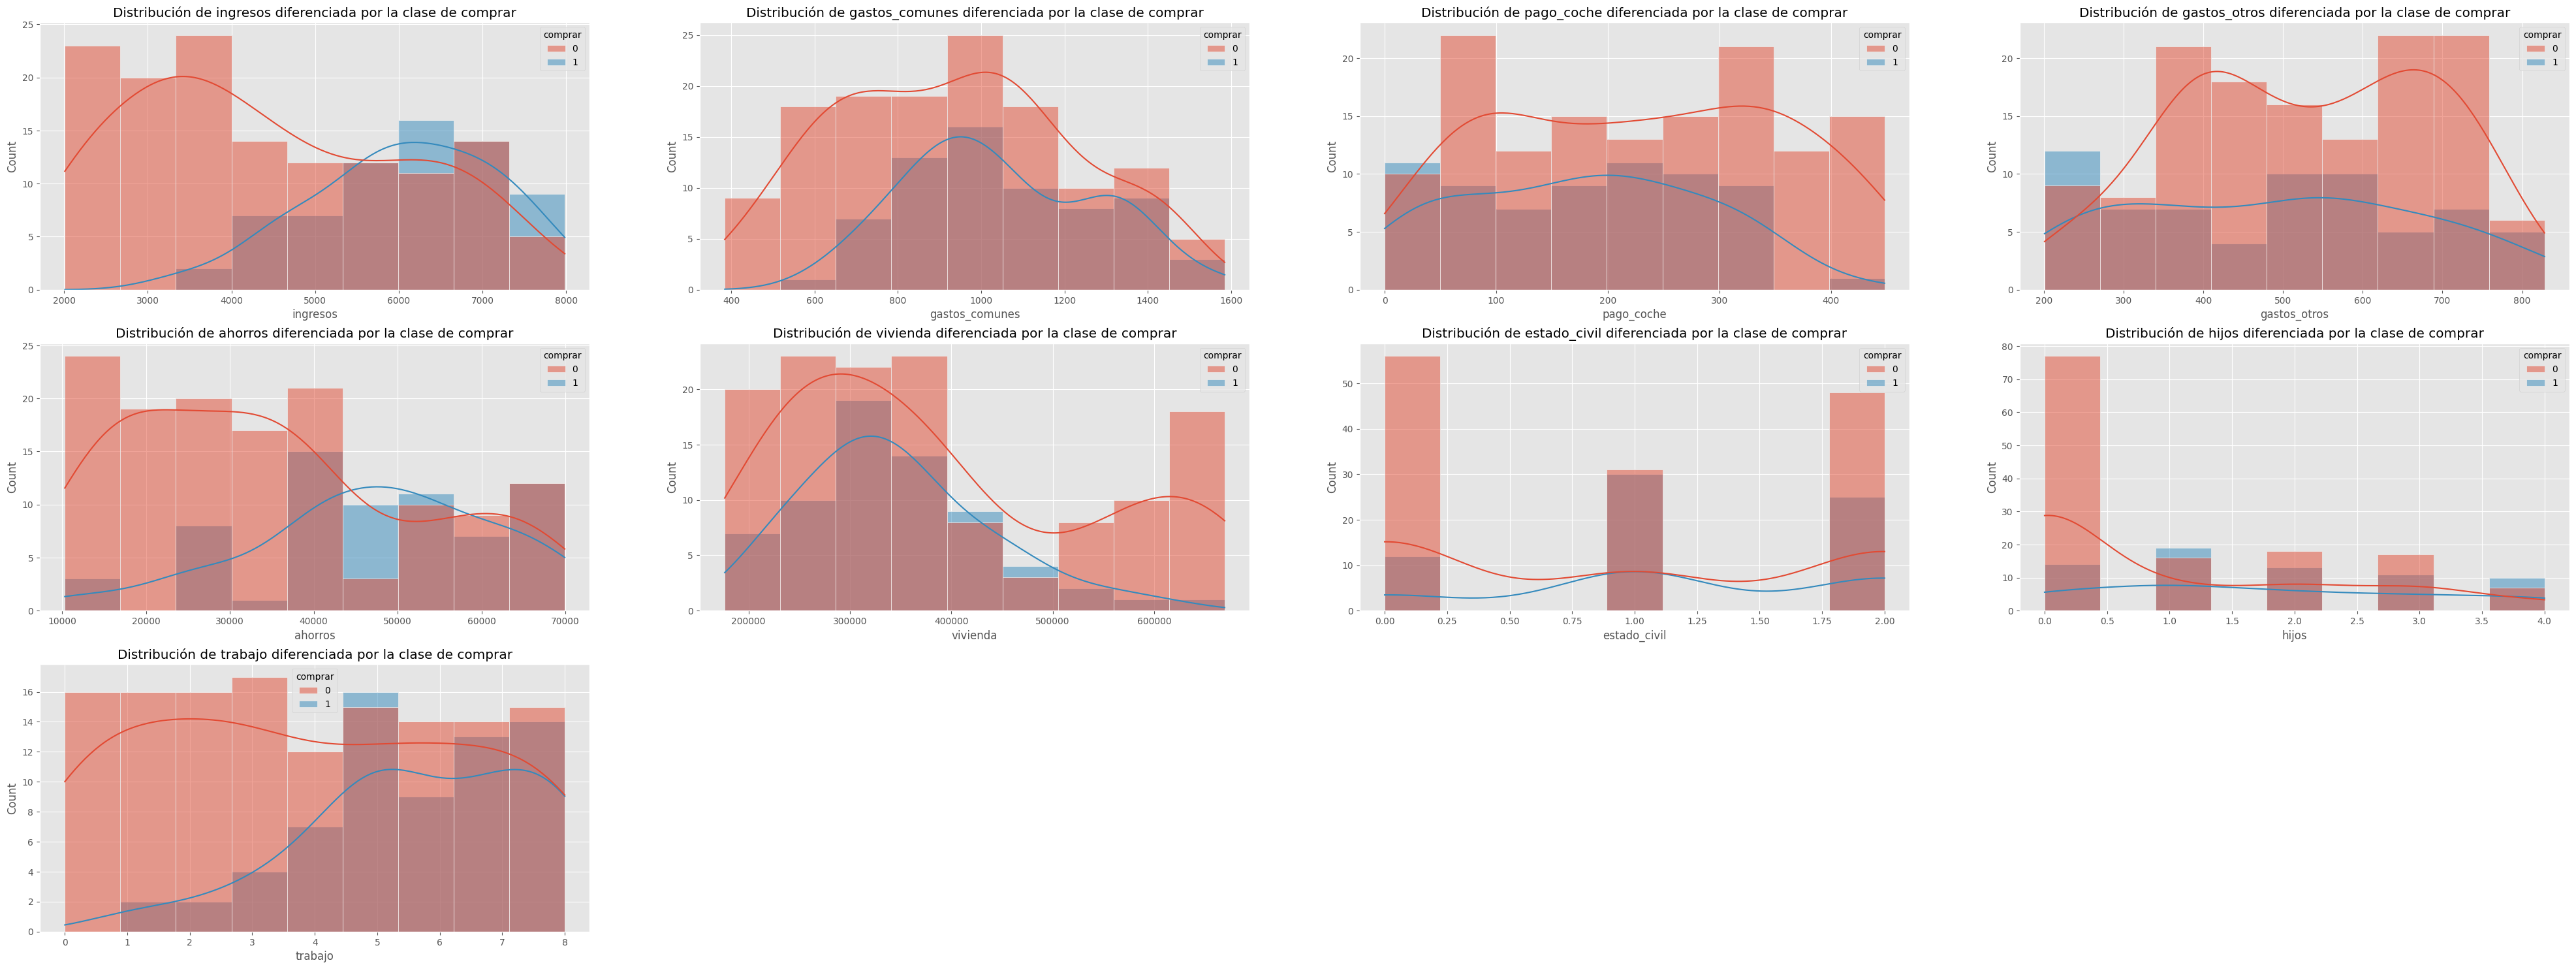

In [24]:
plt.figure(figsize=(50, 50))

plt.subplot(8, 4, 1)
sns.histplot(data=df, x='ingresos', hue='comprar', kde=True)
plt.title('Distribución de ingresos diferenciada por la clase de comprar')

plt.subplot(8, 4, 2)
sns.histplot(data=df, x='gastos_comunes', hue='comprar', kde=True)
plt.title('Distribución de gastos_comunes diferenciada por la clase de comprar')

plt.subplot(8, 4, 3)
sns.histplot(data=df, x='pago_coche', hue='comprar', kde=True)
plt.title('Distribución de pago_coche diferenciada por la clase de comprar')

plt.subplot(8, 4, 4)
sns.histplot(data=df, x='gastos_otros', hue='comprar', kde=True)
plt.title('Distribución de gastos_otros diferenciada por la clase de comprar')

plt.subplot(8, 4, 5)
sns.histplot(data=df, x='ahorros', hue='comprar', kde=True)
plt.title('Distribución de ahorros diferenciada por la clase de comprar')

plt.subplot(8, 4, 6)
sns.histplot(data=df, x='vivienda', hue='comprar', kde=True)
plt.title('Distribución de vivienda diferenciada por la clase de comprar')

plt.subplot(8, 4, 7)
sns.histplot(data=df, x='estado_civil', hue='comprar', kde=True)
plt.title('Distribución de estado_civil diferenciada por la clase de comprar')

plt.subplot(8, 4, 8)
sns.histplot(data=df, x='hijos', hue='comprar', kde=True)
plt.title('Distribución de hijos diferenciada por la clase de comprar')

plt.subplot(8, 4, 9)
sns.histplot(data=df, x='trabajo', hue='comprar', kde=True)
plt.title('Distribución de trabajo diferenciada por la clase de comprar')

plt.show()

## Estandariza los datos
Como el objetivo de estos primeros apartados no es encontrar el mejor modelo con el mejor accuracy, por sencillez, no es necesario dividir en train y test.

## Aplicamos PCA
Aplica el algoritmo de PCA para 9 components, es decir, para todas las features

In [5]:
pca_pipe = make_pipeline(StandardScaler(), PCA(n_components=9))
pca_pipe.fit(df)
result = pca_pipe.transform(df)
modelo_pca = pca_pipe['pca']

### Veamos cómo de buenos predictores son las nuevas dimensiones
Responde a las siguientes preguntas:
1. ¿Cuánta varianza explica cada Principal Component?
2. ¿Y de manera acumulada empezando por el PC1?
3. ¿Cuánta varianza explicarían sólo 5 componentes?

In [6]:
pca_model = pca_pipe.named_steps['pca']
varianza_por_componente = pca_model.explained_variance_ratio_
print("Varianza explicada por cada Principal Component:")
print(varianza_por_componente)

Varianza explicada por cada Principal Component:
[0.27368381 0.23958688 0.10991099 0.10411098 0.09105662 0.07352523
 0.0457761  0.02745036 0.02469122]


In [9]:
varianza_acumulada = varianza_por_componente.cumsum()
print("Varianza explicada acumulada empezando por el PC1:")
print(varianza_acumulada)

Varianza explicada acumulada empezando por el PC1:
[0.27368381 0.51327069 0.62318168 0.72729266 0.81834928 0.8918745
 0.9376506  0.96510097 0.98979219]


In [8]:
varianza_5_componentes = varianza_acumulada[4]
print("Varianza explicada por las primeras 5 componentes:",round(varianza_5_componentes * 100, 2), '%')

Varianza explicada por las primeras 5 componentes: 81.83 %


### Graficamos la variacion explicada acumulada
Representa en un diagrama de lineas la evolución de la varianza acumulada en función de los PC

------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------
[0.27368381 0.51327069 0.62318168 0.72729266 0.81834928 0.8918745
 0.9376506  0.96510097 0.98979219]


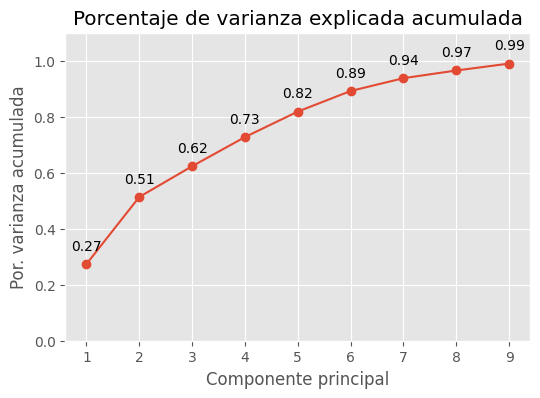

In [10]:
# Porcentaje de varianza explicada acumulada
# ==============================================================================
prop_varianza_acum = modelo_pca.explained_variance_ratio_.cumsum()
print('------------------------------------------')
print('Porcentaje de varianza explicada acumulada')
print('------------------------------------------')
print(prop_varianza_acum)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.plot(
    np.arange(len(prop_varianza_acum)) + 1,
    prop_varianza_acum,
    marker='o'
)

for x, y in zip(np.arange(len(prop_varianza_acum)) + 1, prop_varianza_acum):
    label = round(y, 2)
    ax.annotate(
        label,
        (x, y),
        textcoords="offset points",
        xytext=(0, 10),
        ha='center'
    )

ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_title('Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza acumulada');

### Veamos la correlación entre las nuevas componentes y las dimensiones originales
Representa en un mapa de calor los PCA vs las variables originales. Esta información la puedes obtener del atributo de PCA *components_*.

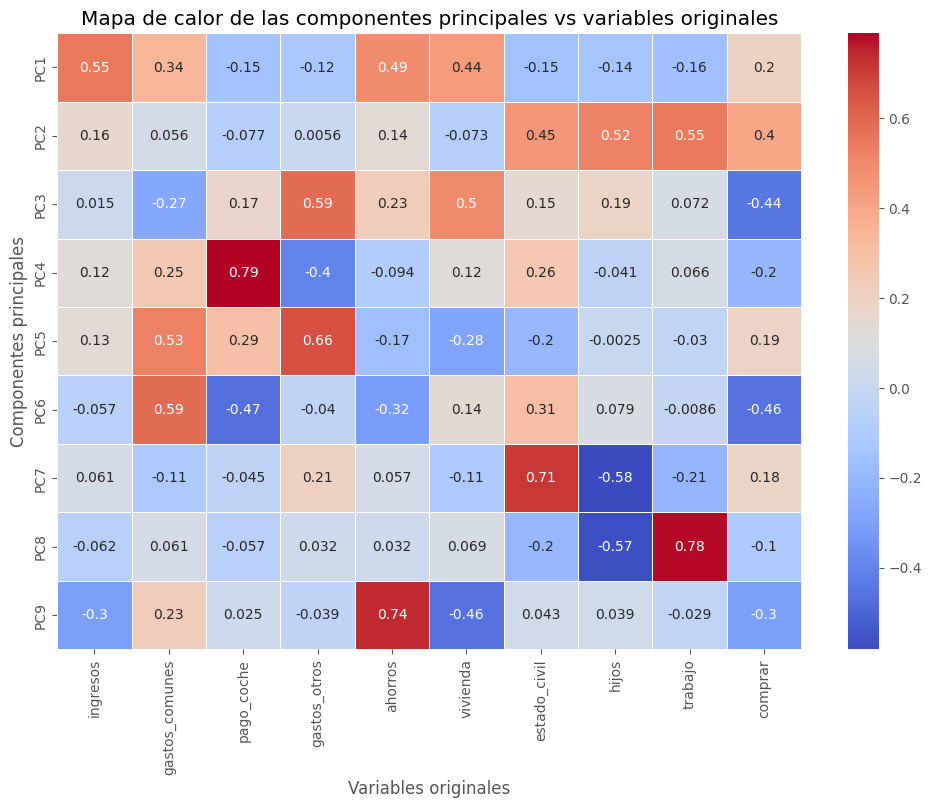

In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pca_model = pca_pipe.named_steps['pca']
componentes = pca_model.components_

df_componentes = pd.DataFrame(
    componentes,
    columns=df.columns,
    index=[f'PC{i+1}' for i in range(pca_model.n_components_)]
)

plt.figure(figsize=(12, 8))
sns.heatmap(df_componentes, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Mapa de calor de las componentes principales vs variables originales')
plt.xlabel('Variables originales')
plt.ylabel('Componentes principales')
plt.show()


## Predicciones
1. Divide en train y test
2. Prepara un pipeline compuesto por:
    - StandardScaler,
    - PCA de 5 componentes
    - Un clasificador
3. Entrena
4. Predice con test
5. Calcula el accuracy score en train y test
6. Representa la matriz de confusión
7. ¿Qué combinación de parámetros y componentes mejoraría el accuracy en test?
8. Vuelve a iterar de nuevo con un gridsearch
9. Guarda tu mejor modelo

In [49]:
from sklearn.datasets import make_classification

x, y = make_classification(random_state=2)

In [51]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [48]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=5)),
    ('classifier', RandomForestClassifier(random_state=42))
])


In [52]:
pipeline.fit(x_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=5)),
                ('classifier', RandomForestClassifier(random_state=42))])

In [53]:
y_pred_train = pipeline.predict(x_train)
y_pred_test = pipeline.predict(x_test)

In [54]:
from sklearn.metrics import accuracy_score

accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)

print('Accuracy en train:',round(accuracy_train * 100, 2), '%')
print('Accuracy en train:',round(accuracy_test * 100, 2), '%')

Accuracy en train: 100.0 %
Accuracy en train: 43.33 %


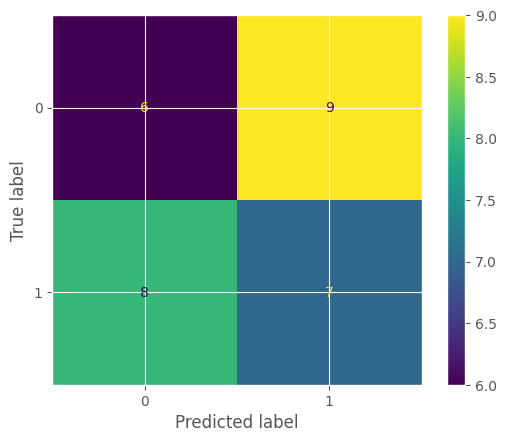

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(pipeline, x_test, y_test)
plt.show()

In [57]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'pca__n_components': [3, 5, 7],
    'classifier__n_estimators': [50, 100],
    'classifier__max_depth': [10, 20]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

print("Mejores parámetros:", grid_search.best_params_)
print("Mejor score en entrenamiento:", grid_search.best_score_)

Mejores parámetros: {'classifier__max_depth': 10, 'classifier__n_estimators': 50, 'pca__n_components': 7}
Mejor score en entrenamiento: 0.7571428571428572


In [ ]:
import joblib

best_model = grid_search.best_estimator_
joblib.dump(best_model, 'mejor_modelo.pkl')
print("Modelo guardado como 'mejor_modelo.pkl'")

Modelo guardado como 'mejor_modelo.pkl'
